# Task 2 - Session Data
##     Hypothesis Testing

In [1]:
# There are three variable in session data:
# session, clickouts and booking
# lets see whether there is connection between booking with session and clickouts
# Below are the hypothesis that can be tested

### Hypothesis 1. Session: less session less booking, increased session most likely to improve booking 
### Hypothesis 2. Clickouts: less clickouts more booking, more clickouts less or no booking

In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

session_data = pd.read_csv("session_data.csv",delimiter = ";")

In [3]:
session_data

,session,session_start_text,session_end_text,clickouts,booking
0,20170503000001,06:11:53,06:15:11,3,0
1,20170503000002,21:06:41,21:08:23,3,0
2,20170503000003,12:03:01,12:06:02,3,0
3,20170503000004,05:58:00,06:02:56,0,0
4,20170503000005,09:13:43,09:17:01,1,0
5,20170503000006,01:27:37,01:30:23,4,0
6,20170503000007,04:17:08,04:20:22,3,0
7,20170503000008,19:33:08,19:36:37,2,1
8,20170503000009,22:22:40,22:25:20,2,0
9,20170503000010,09:00:37,09:05:37,4,0


In [4]:
session_data1 = pd.DataFrame(session_data['session_start_text'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])))
session_data2 = pd.DataFrame(session_data['session_end_text'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1])))
session_data1
session_data2

,session_end_text
0,375
1,1268
2,726
3,362
4,557
5,90
6,260
7,1176
8,1345
9,545


In [5]:
session_data['session_StartTime_minutes'] = session_data1
session_data['session_EndTime_minutes'] = session_data2

In [6]:
session_data

,session,session_start_text,session_end_text,clickouts,booking,session_StartTime_minutes,session_EndTime_minutes
0,20170503000001,06:11:53,06:15:11,3,0,371,375
1,20170503000002,21:06:41,21:08:23,3,0,1266,1268
2,20170503000003,12:03:01,12:06:02,3,0,723,726
3,20170503000004,05:58:00,06:02:56,0,0,358,362
4,20170503000005,09:13:43,09:17:01,1,0,553,557
5,20170503000006,01:27:37,01:30:23,4,0,87,90
6,20170503000007,04:17:08,04:20:22,3,0,257,260
7,20170503000008,19:33:08,19:36:37,2,1,1173,1176
8,20170503000009,22:22:40,22:25:20,2,0,1342,1345
9,20170503000010,09:00:37,09:05:37,4,0,540,545


In [7]:
session_data = session_data.drop(['session_start_text','session_end_text'],axis=1)
session_data

,session,clickouts,booking,session_StartTime_minutes,session_EndTime_minutes
0,20170503000001,3,0,371,375
1,20170503000002,3,0,1266,1268
2,20170503000003,3,0,723,726
3,20170503000004,0,0,358,362
4,20170503000005,1,0,553,557
5,20170503000006,4,0,87,90
6,20170503000007,3,0,257,260
7,20170503000008,2,1,1173,1176
8,20170503000009,2,0,1342,1345
9,20170503000010,4,0,540,545


In [8]:
target_count = session_data['booking'].value_counts()
target_count

0    9033
1     967
Name: booking, dtype: int64

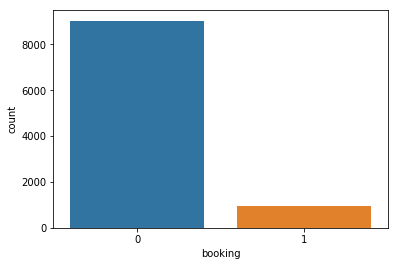

In [9]:
sns.countplot(session_data['booking'],label="Count")

In [10]:
count_class_0, count_class_1 = session_data['booking'].value_counts()
df_class_0 = session_data[session_data['booking'] == 0]
df_class_1 = session_data[session_data['booking'] == 1]
df_class_1.head() #remove the comments to view the data

,session,clickouts,booking,session_StartTime_minutes,session_EndTime_minutes
7,20170503000008,2,1,1173,1176
14,20170503000015,2,1,636,639
15,20170503000016,3,1,1021,1025
35,20170503000036,3,1,1337,1341
38,20170503000039,4,1,1114,1118


# Random down sampling
##### session_data consists of more 0's than 1's in booking variable, which we need to bring down sample that equally represents 0's and 1's. Now we get to create a model to undersatnd the connection between booking and other model.

In [11]:
from sklearn.utils import resample
df_class_0_downsample = resample(df_class_0, 
                                 replace=True,     
                                 n_samples=967)
df_under = pd.concat([df_class_0_downsample, df_class_1], axis=0)
df_under.booking.value_counts()

1    967
0    967
Name: booking, dtype: int64

In [12]:
X = df_under.drop(['booking'],axis=1)
X.head()

,session,clickouts,session_StartTime_minutes,session_EndTime_minutes
3653,20170503003654,3,193,194
8061,20170503008062,2,604,607
3814,20170503003815,2,1256,1260
9776,20170503009777,3,1129,1131
5984,20170503005985,2,491,493


In [13]:
y = df_under['booking']
y.head()

3653    0
8061    0
3814    0
9776    0
5984    0
Name: booking, dtype: int64

#### Now, split the data to create train and test set to run the Logistic Regression model 

In [14]:
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
cv = model_selection.KFold(n_splits=10, random_state=7, shuffle= True)
clf = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='multinomial')
results = model_selection.cross_val_score(clf,X,y,cv=cv)
print("Accuracy %.3f%%" % (results.mean()*100))

Accuracy 46.588%


#### Accuracy is 46.58% which is very very less, which means prediction of booking with dependent variables are very less.
## Summary Statistics & Looking at the data
#### Now that I got everything loaded into Python and named appropriately let's take a look at the data. We can use the pandas function describe to give us a summarized view of everything. 

In [15]:
# summarize the data
df_under.describe()

,session,clickouts,booking,session_StartTime_minutes,session_EndTime_minutes
count,1.934000e+03,1934.000000,1934.000000,1934.000000,1934.000000
mean,2.017050e+13,2.386763,0.500000,723.955016,725.477766
std,2.898123e+03,1.073285,0.500129,417.449727,417.508013
min,2.017050e+13,0.000000,0.000000,0.000000,1.000000
25%,2.017050e+13,2.000000,0.000000,366.500000,365.750000
50%,2.017050e+13,2.000000,0.500000,726.000000,727.500000
75%,2.017050e+13,3.000000,1.000000,1083.000000,1086.000000
max,2.017050e+13,6.000000,1.000000,1439.000000,1439.000000


In [16]:
# take a look at the standard deviation of each column
df_under.std()

session                      2898.123341
clickouts                       1.073285
booking                         0.500129
session_StartTime_minutes     417.449727
session_EndTime_minutes       417.508013
dtype: float64

In [17]:
# crosstab makes it really easy to do multidimensional frequency tables
pd.crosstab(df_under['booking'], df_under['clickouts'], rownames=['booking'])

clickouts,0,1,2,3,4,5,6
booking,,,,,,,
0,17,147,340,322,130,10,1
1,69,131,345,283,119,19,1


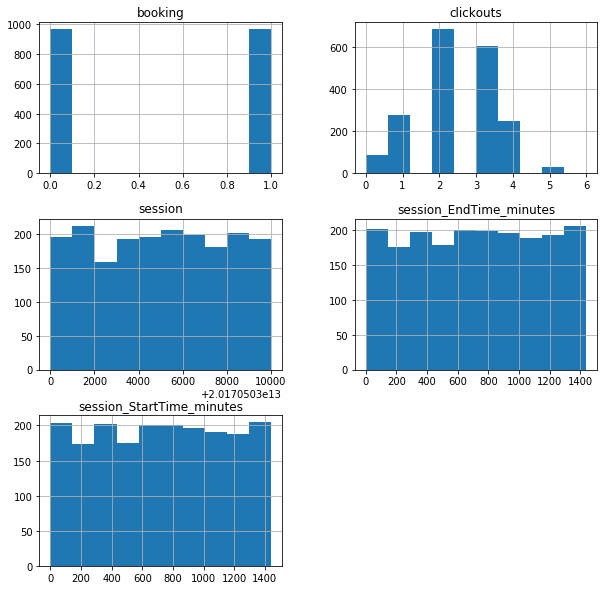

In [18]:
df_under.hist(figsize=(10, 10))
plt.show()

## dummy variables
#### pandas gives you a great deal of control over how categorical variables are represented. We're going dummify the "clickouts" column using get_dummies.

In [19]:
clickouts_count = df_under['clickouts'].value_counts()
clickouts_count

2    685
3    605
1    278
4    249
0     86
5     29
6      2
Name: clickouts, dtype: int64

#### get_dummies creates a new DataFrame with binary indicator variables for each category/option in the column specified. In this case, clickouts has seven levels: 0,1, 2, 3, 4, 5 and 6 (most booking by 1 clickout). When we call get_dummies, we get a dataframe with seven columns, each of which describes one of those levels.

In [20]:
# dummify rank
dummy_ranks = pd.get_dummies(df_under['clickouts'], prefix='clickouts')
dummy_ranks.head()

,clickouts_0,clickouts_1,clickouts_2,clickouts_3,clickouts_4,clickouts_5,clickouts_6
3653,0,0,0,1,0,0,0
8061,0,0,1,0,0,0,0
3814,0,0,1,0,0,0,0
9776,0,0,0,1,0,0,0
5984,0,0,1,0,0,0,0


In [21]:
# create a clean data frame for the regression
cols_to_keep = ['booking', 'session', 'session_StartTime_minutes', 'session_EndTime_minutes']
data = df_under[cols_to_keep].join(dummy_ranks.loc[:, 'clickouts_2':])
# manually add the intercept
data['intercept'] = 1.0
data

,booking,session,session_StartTime_minutes,session_EndTime_minutes,clickouts_2,clickouts_3,clickouts_4,clickouts_5,clickouts_6,intercept
7,1,20170503000008,1173,1176,1,0,0,0,0,1.0
14,1,20170503000015,636,639,1,0,0,0,0,1.0
15,1,20170503000016,1021,1025,0,1,0,0,0,1.0
35,1,20170503000036,1337,1341,0,1,0,0,0,1.0
36,0,20170503000037,1360,1362,0,1,0,0,0,1.0
38,1,20170503000039,1114,1118,0,0,1,0,0,1.0
42,1,20170503000043,1149,1153,1,0,0,0,0,1.0
43,0,20170503000044,1143,1145,1,0,0,0,0,1.0
46,1,20170503000047,828,830,0,0,0,0,0,1.0
51,1,20170503000052,1114,1117,1,0,0,0,0,1.0


#### We merge the new dummy columns into the original dataset and get rid of the clickouts column which is no longer need.
#### Lastly we're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.
## Performing the regression
#### Actually doing the Logistic Regression is quite simple. Specify the column (y which is booking column) containing the variable you're trying to predict followed by the columns (X which is other columns) that the model should use to make the prediction.

#### In our case we'll be predicting the booking column using clickouts and session_StartTime_minutes, session_EndTime_minutes. We're going to treat session column as our baseline and exclude it from our fit. This is done to prevent multicollinearity, or the dummy variable trap caused by including a dummy variable for every single category.

In [22]:
train_cols = data.columns[2:]
# Index(['session', 'session_StartTime_minutes', 'session_EndTime_minutes','clickouts_2', 'clickouts_3',
#    'clickouts_4', 'clickouts_5','clickouts_6', 'intercept'], dtype='object')

logit = sm.Logit(data['booking'], data[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.687308
         Iterations 9


#### Since we're doing a logistic regression, we're going to use the statsmodels Logit function. For details on other models available in statsmodels
## Interpreting the results

In [23]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                booking   No. Observations:                 2042
Model:                          Logit   Df Residuals:                     2034
Method:                           MLE   Df Model:                            7
Date:                Wed, 23 Oct 2019   Pseudo R-squ.:                0.006418
Time:                        20:07:07   Log-Likelihood:                -1403.5
converged:                       True   LL-Null:                       -1412.5
                                        LLR p-value:                   0.01139
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
session_StartTime_minutes    -0.0350      0.038     -0.917      0.359      -0.110       0.040
session_EndTime_minutes       0.0349      0.038      0.915      0.360      -0.040     

#### We get the overview of the coefficients of the model, how well those coefficients fit, the overall fit quality, and several other statistical measures.
#### The result object also lets us to isolate and inspect parts of the model output. The confidence interval gives us an idea for how robust the coefficients of the model are.


In [24]:
# look at the confidence interval of each coeffecient
result.conf_int()

,0,1
session_StartTime_minutes,-0.109809,0.039796
session_EndTime_minutes,-0.039858,0.109725
clickouts_2,-0.434203,0.068452
clickouts_3,-0.650875,-0.140038
clickouts_4,-0.681238,-0.048603
clickouts_5,-0.280492,1.304346
clickouts_6,-2.944640,2.617495
intercept,-0.248350,0.396532


#### Here, It is confident that there is an inverse relationship between the probability of being booked and the clickouts.

#### That means, the probability of booking  is higher (when clickouts_1==True) as opposed to a lower booking rate when clickouts_6==True (Note that, a clickouts of 1 is the most booked and a clickouts of 6 is the least booked.
## Hence hypothesis 2 is verified.

## odds ratio
#### Take the exponential of each of the coefficients to generate the odds ratios. This explains us how a 1 unit increase or decrease in a variable affects the odds of being booked. For example, we can expect the odds of being booked to decrease by about 50% if the clickouts is 2.

In [25]:
# odds ratios only
import numpy as np
np.exp(result.params)

session_StartTime_minutes    0.965599
session_EndTime_minutes      1.035551
clickouts_2                  0.832872
clickouts_3                  0.673373
clickouts_4                  0.694252
clickouts_5                  1.668503
clickouts_6                  0.849105
intercept                    1.076904
dtype: float64

#### Lets do the same calculations using the coefficients estimated using the confidence interval to get a better picture for how uncertainty in variables can impact the booking rate.

In [26]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
session_StartTime_minutes,0.896006,1.040599,0.965599
session_EndTime_minutes,0.960926,1.115972,1.035551
clickouts_2,0.647781,1.070850,0.832872
clickouts_3,0.521589,0.869326,0.673373
clickouts_4,0.505990,0.952559,0.694252
clickouts_5,0.755412,3.685278,1.668503
clickouts_6,0.052621,13.701354,0.849105
intercept,0.780086,1.486660,1.076904


## Analysing more deeper
#### As a way of evaluating our classifier, I am going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of booking increases/decreases across different variables. 

#### I am going to use np.linspace to create a range of values for "session_StartTime_minutes" and "session_EndTime_minutes". This creates a range of linearly spaced values from a specified min and maximum value.

In [27]:
sess_start_time = np.linspace(data['session_StartTime_minutes'].min(), data['session_StartTime_minutes'].max(), 10)
sess_end_time = np.linspace(data['session_EndTime_minutes'].min(), data['session_EndTime_minutes'].max(), 10)

In [28]:
sess_start_time

array([   0.        ,  159.88888889,  319.77777778,  479.66666667,
        639.55555556,  799.44444444,  959.33333333, 1119.22222222,
       1279.11111111, 1439.        ])

In [29]:
sess_end_time

array([1.00000000e+00, 1.60777778e+02, 3.20555556e+02, 4.80333333e+02,
       6.40111111e+02, 7.99888889e+02, 9.59666667e+02, 1.11944444e+03,
       1.27922222e+03, 1.43900000e+03])

In [30]:
import numpy as np

def cartesian(arrays, out=None):
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = int(n / arrays[0].size)
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [31]:
combos = pd.DataFrame(cartesian([sess_start_time, sess_end_time, [0, 1, 2, 3, 4, 5, 6], [1.]]))
# recreate the dummy variables
combos.columns = ['session_StartTime_minutes', 'session_EndTime_minutes', 'clickouts', 'intercept']
dummy_ranks = pd.get_dummies(combos['clickouts'], prefix='clickouts')
dummy_ranks.columns = ['clickouts_0', 'clickouts_1', 'clickouts_2', 'clickouts_3','clickouts_4','clickouts_5','clickouts_6']

# keep only what we need for making predictions
cols_to_keep = ['session_StartTime_minutes', 'session_EndTime_minutes', 'clickouts', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.loc[:, 'clickouts_2':])

# make predictions on the enumerated dataset
combos['booking_pred'] = result.predict(combos[train_cols])

combos.head()

,session_StartTime_minutes,session_EndTime_minutes,clickouts,intercept,clickouts_2,clickouts_3,clickouts_4,clickouts_5,clickouts_6,booking_pred
0,0.0,1.0,0.0,1.0,0,0,0,0,0,0.527229
1,0.0,1.0,1.0,1.0,0,0,0,0,0,0.527229
2,0.0,1.0,2.0,1.0,1,0,0,0,0,0.481546
3,0.0,1.0,3.0,1.0,0,1,0,0,0,0.428878
4,0.0,1.0,4.0,1.0,0,0,1,0,0,0.436373


##### Now predictions are generated. To visualize the results. A function called isolate_and_plot which allows us to compare a given variable with the different prestige levels and the mean probability for that combination.  pivot_table which allows you to easily aggregate the data.

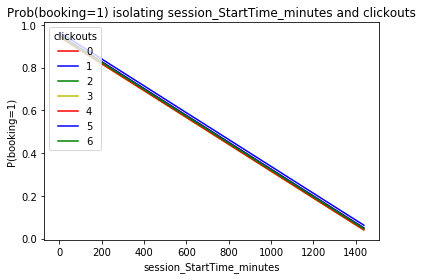

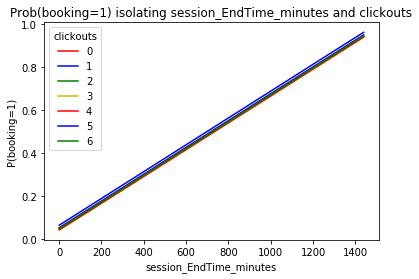

In [32]:
def isolate_and_plot(variable):
    # isolate session and class rank
    grouped = pd.pivot_table(combos, values=['booking_pred'], index=[variable, 'clickouts'],
                            aggfunc=np.mean)
    # make a plot
    colors = 'rbgyrbgy'
    for col in combos.clickouts.unique():
        plt_data = grouped.loc[grouped.index.get_level_values(1)==col]
        plt.plot(plt_data.index.get_level_values(0), plt_data['booking_pred'],
                color=colors[int(col)])

    plt.xlabel(variable)
    plt.ylabel("P(booking=1)")
    plt.legend(['0','1', '2', '3', '4','5','6'], loc='upper left', title='clickouts')
    plt.title("Prob(booking=1) isolating " + variable + " and clickouts")
    plt.show()

isolate_and_plot('session_StartTime_minutes')
isolate_and_plot('session_EndTime_minutes')

#### The resulting plots shows how session start time in minutes, session end time in minutes, and clickouts affect the booking levels. You can see how the probability of booking gradually increases as session start time and session end time increase and that the different clickouts levels yield drastic probabilities of booking (particularly the most/least clickouts).
## Hence Hypothesis 1 is verified